In [2]:
%matplotlib inline


# Plot different SVM classifiers in the iris dataset


Comparison of different linear SVM classifiers on a 2D projection of the iris
dataset. We only consider the first 2 features of this dataset:

- Sepal length
- Sepal width

This example shows how to plot the decision surface for four SVM classifiers
with different kernels.

The linear models ``LinearSVC()`` and ``SVC(kernel='linear')`` yield slightly
different decision boundaries. This can be a consequence of the following
differences:

- ``LinearSVC`` minimizes the squared hinge loss while ``SVC`` minimizes the
  regular hinge loss.

- ``LinearSVC`` uses the One-vs-All (also known as One-vs-Rest) multiclass
  reduction while ``SVC`` uses the One-vs-One multiclass reduction.

Both linear models have linear decision boundaries (intersecting hyperplanes)
while the non-linear kernel models (polynomial or Gaussian RBF) have more
flexible non-linear decision boundaries with shapes that depend on the kind of
kernel and its parameters.

.. NOTE:: while plotting the decision function of classifiers for toy 2D
   datasets can help get an intuitive understanding of their respective
   expressive power, be aware that those intuitions don't always generalize to
   more realistic high-dimensional problems.




In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [55]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [56]:
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [57]:
# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

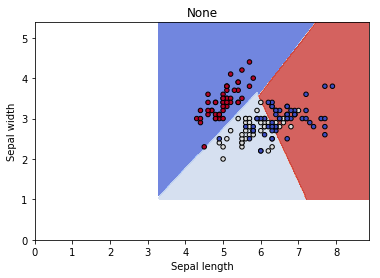

In [58]:
clf=svm.SVC(kernel='linear',C=1)
clf.fit(X,y)
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
fig,ax=plt.subplots()
plot_contours(ax, clf, xx, yy,cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm_r, s=20, edgecolors='k')
ax.set_xlim(0, xx.max())
ax.set_ylim(0, yy.max())
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_title('None')
plt.show()

In [59]:
clf.score(X,y)

0.82

In [60]:
clf.coef_,clf.intercept_

(array([[-2.22720466,  2.24959915],
        [-2.06931629,  1.72277136],
        [-1.60096201, -0.79648515]]),
 array([ 4.9417852 ,  6.17860024, 12.35500605]))

In [61]:
x=np.linspace(0,8,100)

$$w^T[x,y]+b=0$$

In [62]:
w0=clf.coef_[0]
w1=clf.coef_[1]
w2=clf.coef_[2]
b=clf.intercept_
y0=(-w0[0]*x-b[0])/w0[1]
y1=(-w1[0]*x-b[1])/w1[1]
y2=(-w2[0]*x-b[2])/w2[1]

ValueError: Invalid RGBA argument: -2.1967403350996793

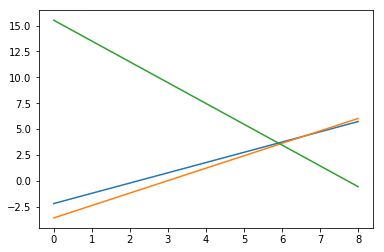

In [53]:
plt.plot(x,y0)
plt.plot(x,y1)
plt.plot(x,y2)
plt.set_xlim(0, xx.max())
#plt.set_ylim(0, yy.max())
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm_r, s=20, edgecolors='k')
plt.show()